In [5]:
from Utils.files import *
import keras
from keras import models, layers
from keras import backend
from Utils.Normalization import *
from Vectorizer.ToImg import *
#from GridMatrix.Validation import *

In [6]:
## definindo arquitetura da CNN
class CNN(models.Sequential):
    
    def __init__(self, input_shape, num_classes):
        
        super().__init__()
        '''
        self.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        self.add(layers.MaxPool2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Conv2D(32, (3, 3), activation='relu'))
        self.add(layers.MaxPool2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='rmsprop',
                     metrics=['accuracy'])
        '''
        
        self.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
        self.add(layers.BatchNormalization(name="batch_norm_1"))
        self.add(layers.LeakyReLU(alpha=0.1))
        self.add(layers.MaxPool2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Conv2D(32, (3, 3)))
        self.add(layers.BatchNormalization(name="batch_norm_2"))
        self.add(layers.LeakyReLU(alpha=0.1))
        self.add(layers.MaxPool2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))
                
        self.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='rmsprop',
                     metrics=['accuracy'])
        
        
        

class Data():
    def __init__(self, dataset, m, n):
        # tratamento 
        x_trains, y_trains, x_tests, y_tests = get_data(dataset)
        x_trains = feature_scaling_datasets(x_trains)
        x_tests = feature_scaling_datasets(x_tests)
        
        self.first_train = x_trains
        
        g = ToImg(m, n)
        
        x_train = g.dataset_to_matrix(x_trains)
        x_test = g.dataset_to_matrix(x_tests)
                        
        img_rows, img_cols = x_train.shape[1:]
        class_set = set(y_trains)
        
        num_classes = len(class_set)
        min_class = min(class_set)
        
        y_trains = [y-min_class for y in y_trains]
        y_tests = [y-min_class for y in y_tests]
        
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1,
                                      img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1,
                                    img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        
        else:
            
            x_train = x_train.reshape(x_train.shape[0],
                                      img_rows, img_cols, 1)
            
            x_test = x_test.reshape(x_test.shape[0], img_rows,
                                    img_cols, 1)
            
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        
        #x_train /= 255
        #x_test /= 255

        y_train = keras.utils.to_categorical(y_trains, num_classes)
        y_test = keras.utils.to_categorical(y_tests, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [7]:
batch_size = 5
#epochs = 75
epochs = 100
#dataset = "CBF1d"
dataset = "CBF"
data = Data(dataset, 28, 28)
model = CNN(data.input_shape, data.num_classes)
model.summary()

Model: "cnn_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 11, 11, 32)        128   

Train on 27 samples, validate on 3 samples
Epoch 1/100
27/27 [==============================] - 0s 16ms/step - loss: 3.9349 - accuracy: 0.4815 - val_loss: 2.8380 - val_accuracy: 0.3333
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 2.3636 - accuracy: 0.8148 - val_loss: 2.6142 - val_accuracy: 1.0000
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 2.4001 - accuracy: 0.8148 - val_loss: 2.5357 - val_accuracy: 1.0000
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 1.9865 - accuracy: 0.8889 - val_loss: 2.5601 - val_accuracy: 0.6667
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 1.6951 - accuracy: 1.0000 - val_loss: 2.3989 - val_accuracy: 1.0000
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 1.9391 - accuracy: 0.9259 - val_loss: 2.3116 - val_accuracy: 1.0000
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 1.5606 - accuracy: 1.0000 - val_loss:

27/27 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 0.1568 - val_accuracy: 1.0000
Epoch 59/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 1.0000
Epoch 60/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 0.2044 - val_accuracy: 1.0000
Epoch 61/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 62/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 1.0000
Epoch 63/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 64/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 65/100
27/27 

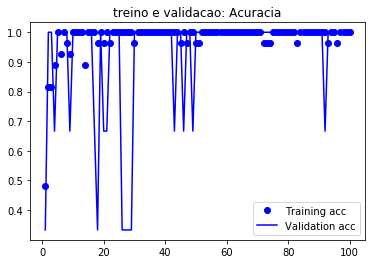

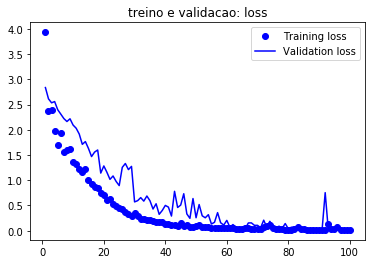

In [8]:
valores = model.fit(data.x_train, data.y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        shuffle=True,
                        validation_split=0.1)

score = model.evaluate(data.x_test, data.y_test)

print('Test loss:', score[0])
print('Test accuracy : ', score[1])
error_rate = round(1 - score[1], 3)

print('error rate of :', error_rate)

# plotting results
import matplotlib.pyplot as plt
acc = valores.history['accuracy']
val_acc = valores.history['val_accuracy']
loss = valores.history['loss']
val_loss = valores.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')


plt.title('treino e validacao: Acuracia')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('treino e validacao: loss')
plt.legend()
plt.show()